In [1]:
# !nvidia-smi

In [2]:
# !pip install -q  supervision roboflow 

In [3]:
# !pip install -q git+https://github.com/ultralytics/ultralytics.git@main git+https://github.com/THU-MIG/yolov10.git

In [4]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Cloning https://github.com/THU-MIG/yolov10.git to /tmp/pip-req-build-hqh_8p0y
  Running command git clone --filter=blob:none --quiet https://github.com/THU-MIG/yolov10.git /tmp/pip-req-build-hqh_8p0y
  Resolved https://github.com/THU-MIG/yolov10.git to commit ea93d4f3791f7271ecdabbe381fe4187eb397833
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.1.34-py3-none-any.whl size=731144 sha256=74bca4b30b9c4af08fef51b0f43a5ce08235f8503ff02676b351bf37954d1fe9
  Stored in directory: /tmp/pip-ephem-wheel-cache-l55zduhg/wheels/56/70/0c/afcd8ae240f72a3f1cb29a722dd11468358e79b63fb41b7d55
Successfully built ultralytics
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a versio

In [5]:
!pip install -q supervision roboflow

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [6]:
!pip install -q huggingface_hub bottleneck==1.3.6 numexpr==2.8.4

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [7]:
import os
HOME = os.getcwd()
print(HOME)
!rm {HOME}/datasets -r -f
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/mnt/linuxlab/home/mstaus1/Desktop/Shellfish_project_2024/Jupyter_local_code
/mnt/linuxlab/home/mstaus1/Desktop/Shellfish_project_2024/Jupyter_local_code/datasets


In [8]:
!mkdir -p {HOME}/weightsyolo
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

total 2.7G
-rw-r--r-- 1 mstaus1 students  80M May 26 11:53 yolov10b.pt
-rw-r--r-- 1 mstaus1 students  80M May 26 11:53 yolov10b.pt.1
-rw-r--r-- 1 mstaus1 students  80M May 26 11:53 yolov10b.pt.2
-rw-r--r-- 1 mstaus1 students  80M May 26 11:53 yolov10b.pt.3
-rw-r--r-- 1 mstaus1 students  80M May 26 11:53 yolov10b.pt.4
-rw-r--r-- 1 mstaus1 students  80M May 26 11:53 yolov10b.pt.5
-rw-r--r-- 1 mstaus1 students  80M May 26 11:53 yolov10b.pt.6
-rw-r--r-- 1 mstaus1 students 100M May 26 11:53 yolov10l.pt
-rw-r--r-- 1 mstaus1 students 100M May 26 11:53 yolov10l.pt.1
-rw-r--r-- 1 mstaus1 students 100M May 26 11:53 yolov10l.pt.2
-rw-r--r-- 1 mstaus1 students 100M May 26 11:53 yolov10l.pt.3
-rw-r--r-- 1 mstaus1 students 100M May 26 11:53 yolov10l.pt.4
-rw-r--r-- 1 mstaus1 students 100M May 26 11:53 yolov10l.pt.5
-rw-r--r-- 1 mstaus1 students 100M May 26 11:53 yolov10l.pt.6
-rw-r--r-- 1 mstaus1 students  64M May 26 11:54 yolov10m.pt
-rw-r--r-- 1 mstaus1 students  64M May 26 11:54 yolov10m.pt.1
-rw

In [9]:
from IPython.display import Image
from roboflow import Roboflow
import cv2
import supervision as sv
from ultralytics import YOLOv10
import random

## Download dataset from Roboflow Universe

In [10]:
rf = Roboflow(api_key="Rvk9Clz4ote58KBvCfU3")
project = rf.workspace("curvy-oysters").project("oysters-cjt7n")
dataset = project.version(19).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.34, to fix: `pip install ultralytics==8.0.196`


Extracting Dataset Version Zip to oysters-19 in yolov8:


In [11]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

## Custom Training

In [12]:
%cd {HOME}

!yolo task=detect mode=train epochs=10 batch=32 plots=True \
model={HOME}/weights/yolov10n.pt \
data={dataset.location}/data.yaml

/mnt/linuxlab/home/mstaus1/Desktop/Shellfish_project_2024/Jupyter_local_code
New https://pypi.org/project/ultralytics/8.2.30 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.9.7 torch-1.10.1+cu113 CUDA:0 (NVIDIA GeForce RTX 4080, 16071MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=/mnt/linuxlab/home/mstaus1/Desktop/Shellfish_project_2024/Jupyter_local_code/weights/yolov10n.pt, data=/mnt/linuxlab/home/mstaus1/Desktop/Shellfish_project_2024/Jupyter_local_code/datasets/oysters-19/data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, o

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         92       1501      0.336      0.408      0.289      0.132

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size
       3/10      6.54G      1.665      1.644      1.671      1.611      2.115   
                 Class     Images  Instances      Box(P          R      mAP50  m/mnt/linuxlab/home/mstaus1/anaconda3/lib/python3.9/site-packages/ultralytics/utils/ops.py:862: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  index = index // nc
                 Class     Images  Instances      Box(P         

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         92       1501      0.602      0.512      0.562       0.32
Speed: 0.8ms preprocess, 2.3ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train2
💡 Learn more at https://docs.ultralytics.com/modes/train


/mnt/linuxlab/home/mstaus1/Desktop/Shellfish_project_2024/Jupyter_local_code


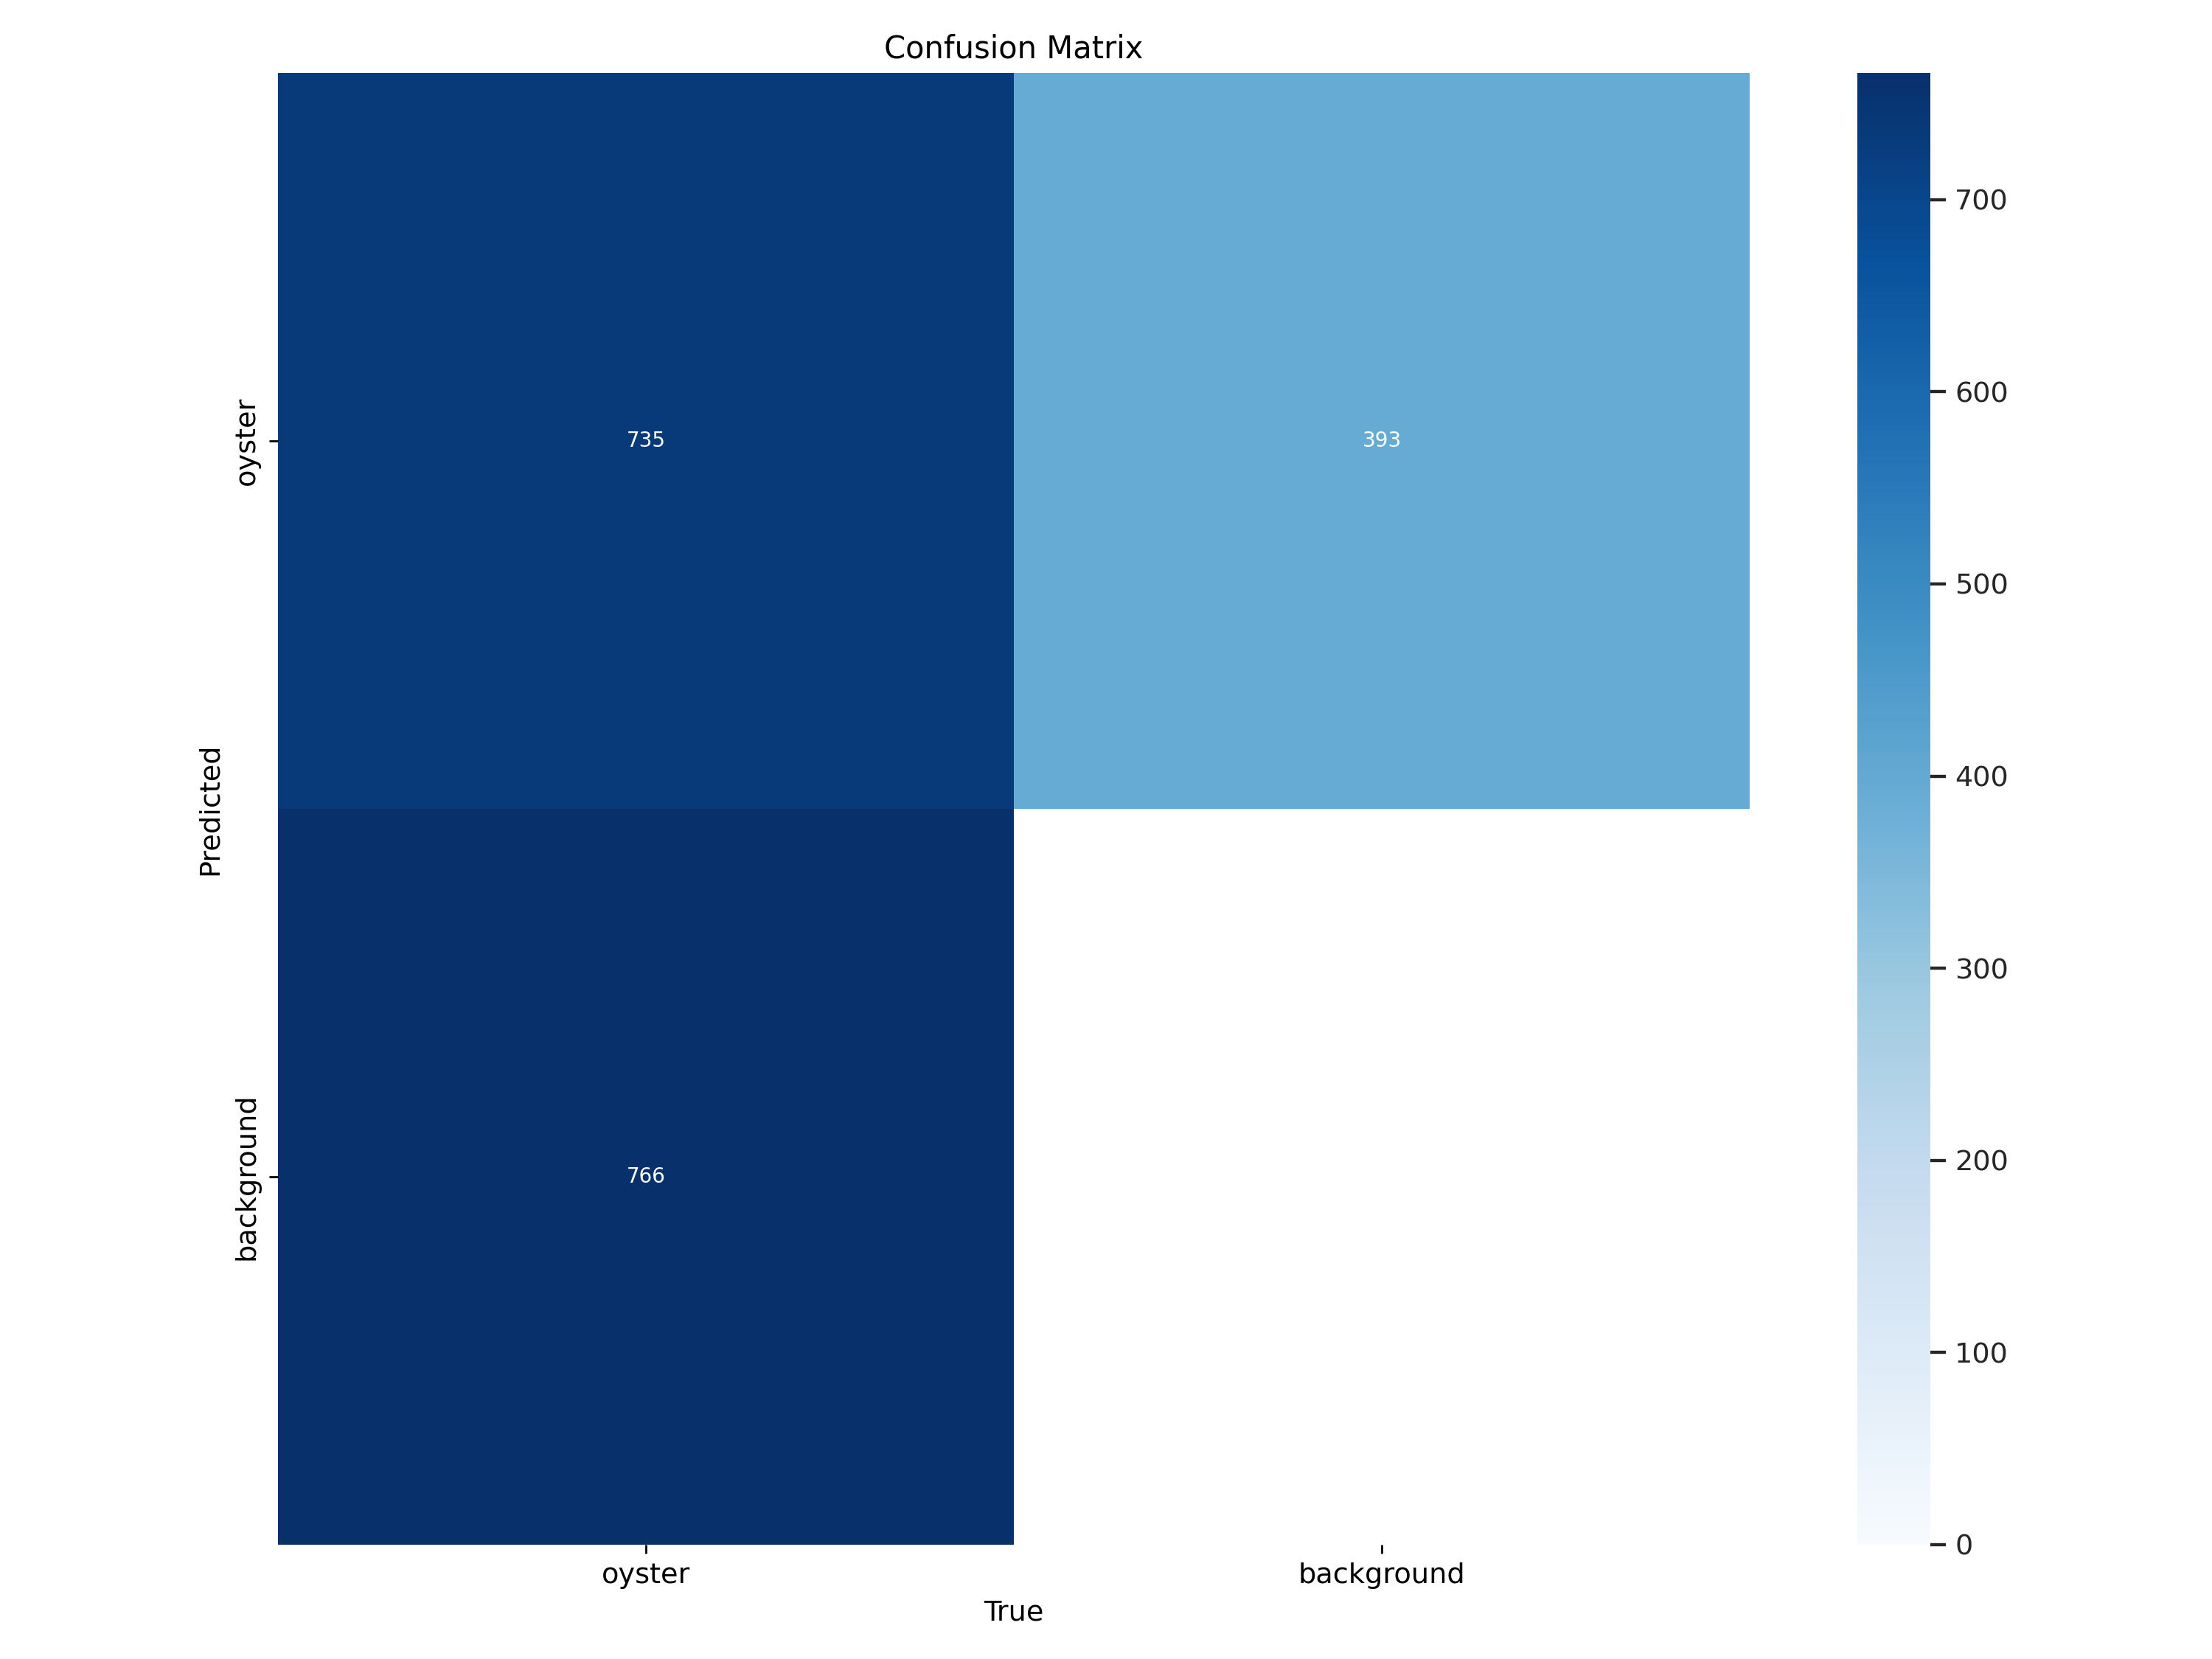

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/mnt/linuxlab/home/mstaus1/Desktop/Shellfish_project_2024/Jupyter_local_code


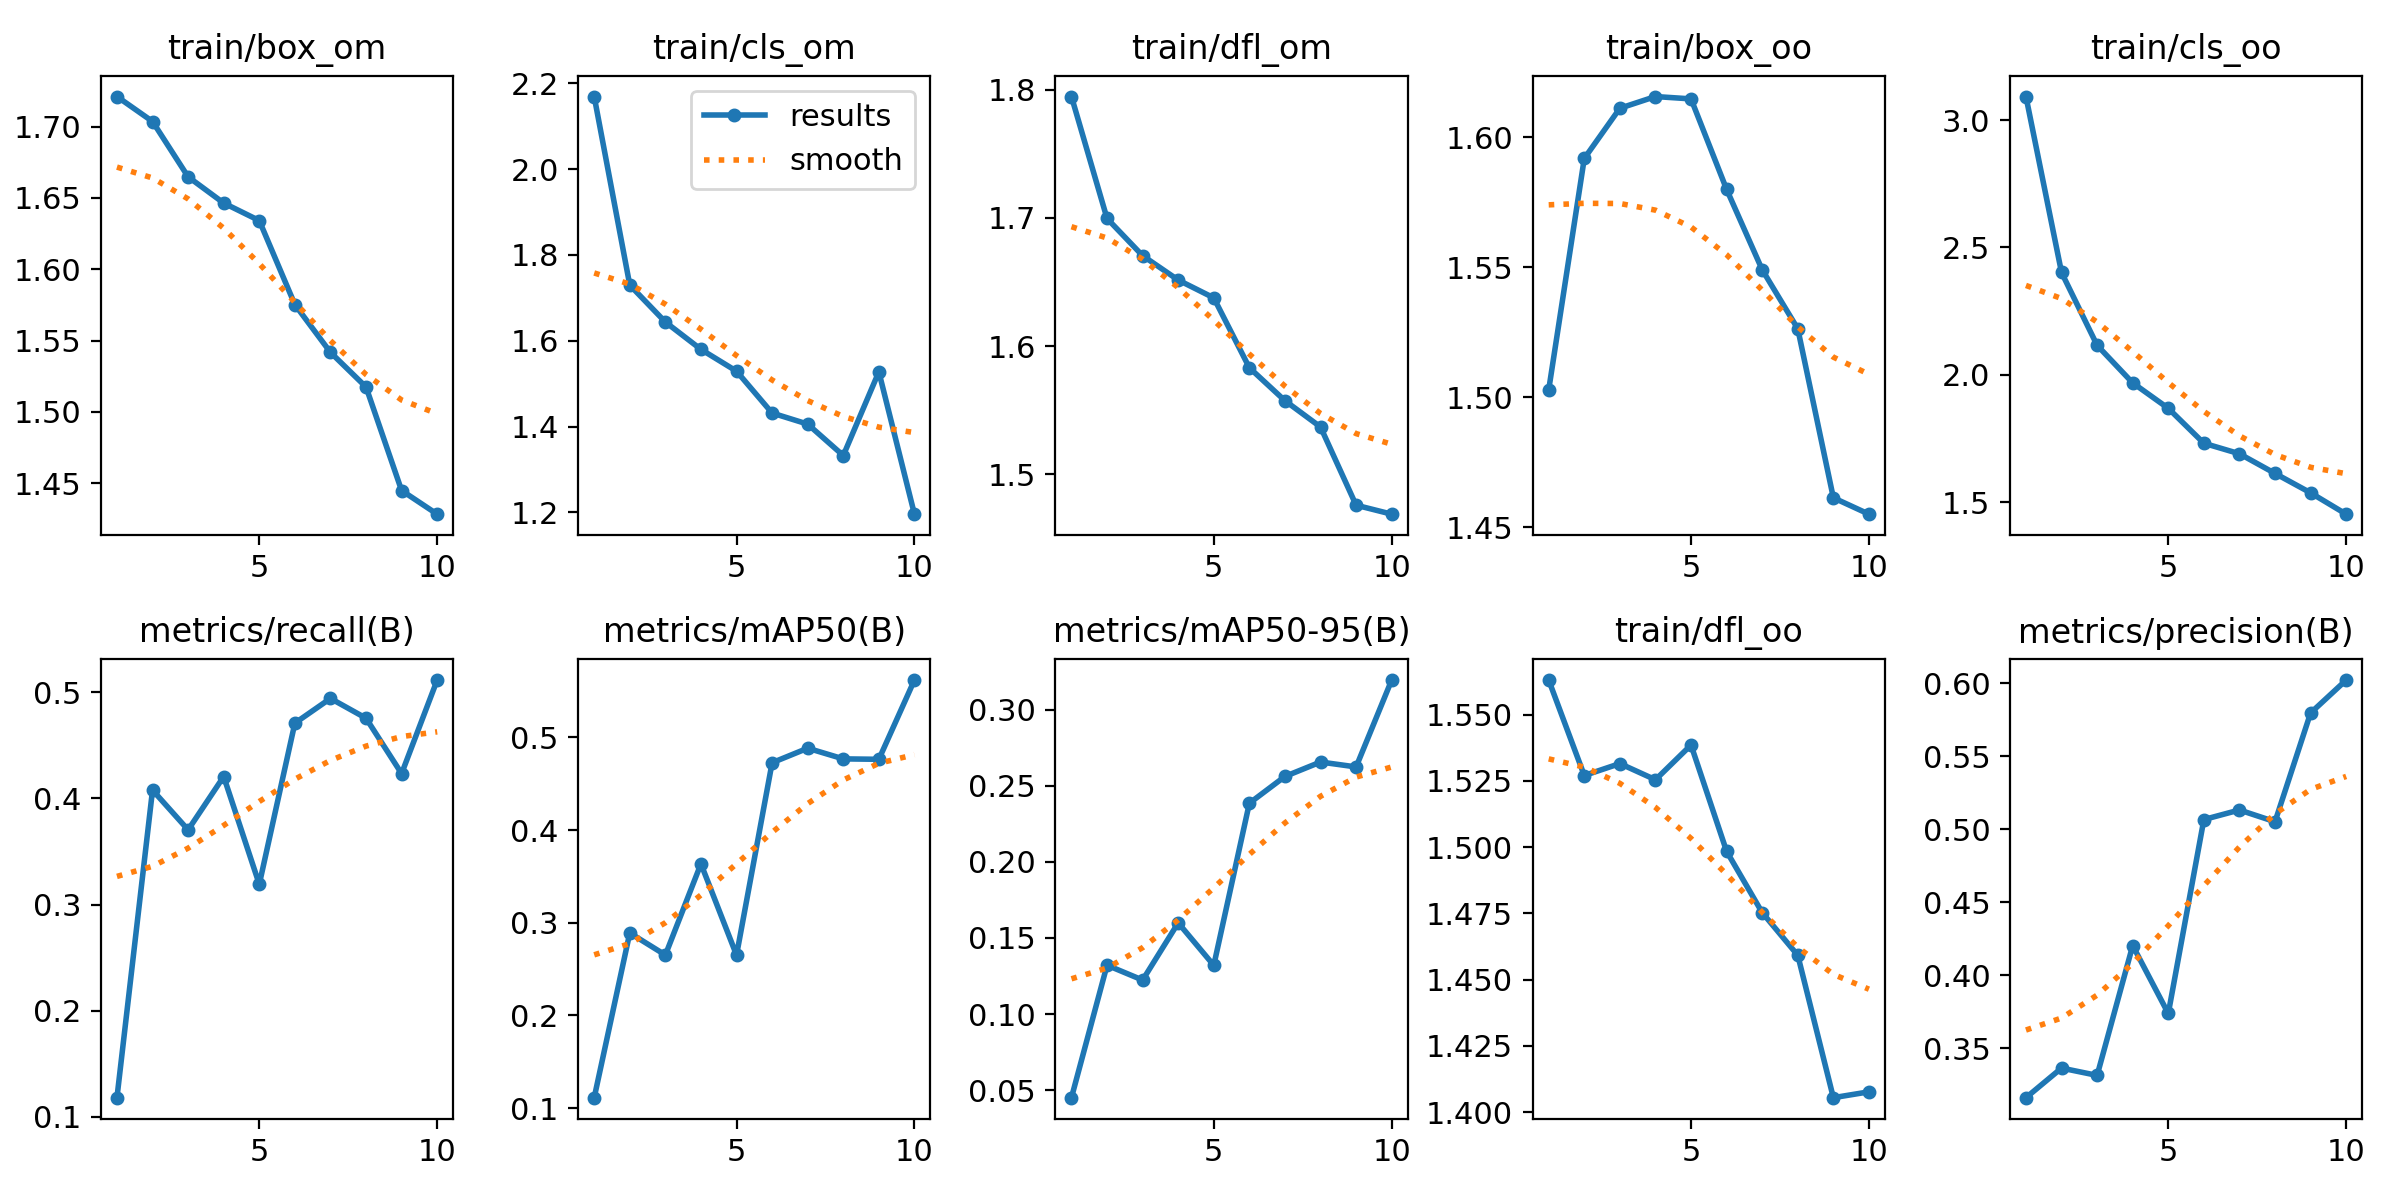

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

## Inference with Custom Model

**NOTE:** Let's start by loading our newly trained model.

In [15]:
model = YOLOv10(f'{HOME}/runs/detect/train/weights/best.pt')

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/valid/images",
    annotations_directory_path=f"{dataset.location}/valid/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

**NOTE:** Let's randomly select an image from our validation set and visualize the results.


0: 640x640 11 oysters, 4.2ms
Speed: 1.0ms preprocess, 4.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


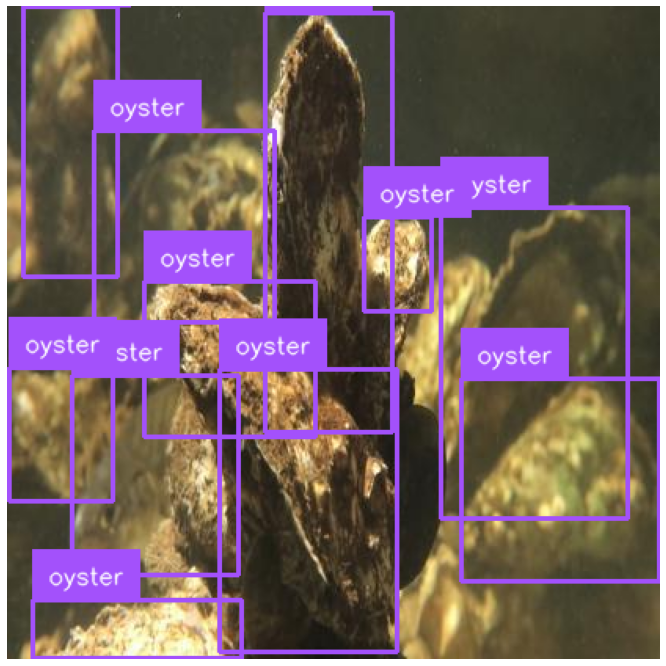

In [17]:
random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)